# Chapter 7: Data-Driven Dynamical Systems

Course title:

**MECH 575T: Data-driven modeling and control (Self-directed)**

Reference text:

**Data-Driven Science and Engineering, by Steve Brunton**

## Contents

1. Computing the DMD

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from platform import python_version
python_version()

'3.7.4'

In [3]:
plot_dir = 'plots'
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

## Computing the DMD

In [4]:
# Code from Steve Brunton's book

def DMD_SB(X,Xprime,r):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)
    
    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b


In [5]:
def dmd(x, x_prime, r):
    """Compute dynamic matrix decomposition.
    """

    # Step 1
    u, sigma, vh = np.linalg.svd(x, full_matrices=False)
    
    u_r = u[:, :r]
    sigma_r = np.diag(sigma[:r])
    v_r = vh[:r, :]

    # Step 2
    a_tilde = np.linalg.solve(sigma_r.T, (u_r.conj().T.dot(x_prime).dot(v_r.conj().T).T).T)
    # a_tilde2 = u_r.conj().T.dot(x_prime).dot(v_r).dot(np.linalg.inv(sigma_r))
    # assert np.array_equal(a_tilde, a_tilde2)
    
    # Step 3
    lam, w = np.linalg.eig(a_tilde) 

    # Step 4
    phi = x_prime.dot(np.linalg.solve(sigma_r.T, v_r).T).dot(w)
    alpha1 = sigma_r.dot(v_r[:, 0])    
    b = np.linalg.solve(w.dot(np.diag(lam)), alpha1)
    
    return phi, lam, b

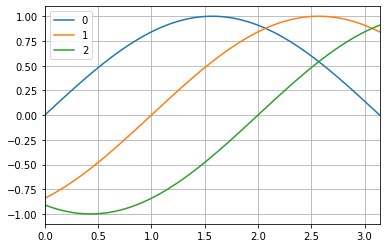

In [6]:
t = np.linspace(0, np.pi, 101)
df = pd.DataFrame(index=t)
df[0] = np.sin(t)
df[1] = np.sin(t - 1)
df[2] = np.sin(t - 2)
assert df.shape == (101, 3)
df.plot()
plt.grid()

In [7]:
x = df.iloc[:-1].values.T
x_prime = df.iloc[1:].values.T
assert x.shape == x_prime.shape
x.shape

(3, 100)

In [8]:
# Step 1
U, Sigma, VT = np.linalg.svd(x,full_matrices=0)
Sigma

array([8.89902569e+00, 8.41470985e+00, 2.48779320e-15])

In [9]:
# Truncate
r = 2

Ur = U[:,:r]
Sigmar = np.diag(Sigma[:r])
VTr = VT[:r,:]

Ur.shape, Sigmar.shape, VTr.shape

((3, 2), (2, 2), (2, 100))

In [10]:
# Step 2 - Compute Atilde
Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ x_prime @ VTr.T).T).T
Atilde

array([[ 0.99950656, -0.03321863],
       [ 0.02970128,  0.99950656]])

In [11]:
# Step 3 - Spectral decomposition of Atilde
Lambda, W = np.linalg.eig(Atilde)
Lambda = np.diag(Lambda)
Lambda

array([[0.99950656+0.03141076j, 0.        +0.j        ],
       [0.        +0.j        , 0.99950656-0.03141076j]])

In [12]:
# Step 4 - Reconstruct DMD modes
Phi = x_prime @ np.linalg.solve(Sigmar.T,VTr).T @ W
alpha1 = Sigmar @ VTr[:,0]
b = np.linalg.solve(W @ Lambda,alpha1)

In [13]:
Phi

array([[-0.29652967-0.49538216j, -0.29652967+0.49538216j],
       [-0.57706538-0.01813501j, -0.57706538+0.01813501j],
       [-0.32704984+0.47578539j, -0.32704984-0.47578539j]])

In [14]:
alpha1

array([1.05900157, 0.64297038])

In [15]:
b

array([0.74307324+0.44479451j, 0.74307324-0.44479451j])

In [16]:
phi, lam, b = dmd(x, x_prime, r=2)

In [17]:
phi

array([[ 0.50983759-0.28857342j,  0.50983759+0.28857342j],
       [ 0.0186642 -0.56158202j,  0.0186642 +0.56158202j],
       [-0.48966897-0.3182747j , -0.48966897+0.3182747j ]])

In [18]:
lam

array([0.99950656+0.03141076j, 0.99950656-0.03141076j])

In [19]:
b

array([0.43090314-0.76273855j, 0.43090314+0.76273855j])

In [20]:
phi, lam, b = DMD_SB(x, x_prime, r=2)

In [21]:
phi

array([[-0.29652967-0.49538216j, -0.29652967+0.49538216j],
       [-0.57706538-0.01813501j, -0.57706538+0.01813501j],
       [-0.32704984+0.47578539j, -0.32704984-0.47578539j]])

In [22]:
lam

array([[0.99950656+0.03141076j, 0.        +0.j        ],
       [0.        +0.j        , 0.99950656-0.03141076j]])

In [23]:
b

array([0.74307324+0.44479451j, 0.74307324-0.44479451j])